## 3. Finish the search problem

Please using the search policy to implement an agent. This agent receives two input, one is @param start station and the other is @param destination. Your agent should give the optimal route based on Beijing Subway system. 

##### 1.	Get data from web page.

> a.	Get web page source from: https://baike.baidu.com/item/%E5%8C%97%E4%BA%AC%E5%9C%B0%E9%93%81/408485

> b.	You may need @package **requests**[https://2.python-requests.org/en/master/] page to get the response via url

> c.	You may need save the page source to file system.

> d.	The target of this step is to get station information of all the subway lines;

> e.	You may need install @package beautiful soup[https://www.crummy.com/software/BeautifulSoup/bs4/doc/]  to get the url information, or just use > Regular Expression to get the url.  Our recommendation is that using the Regular Expression and BeautiflSoup both. 

> f.	You may need BFS to get all the related page url from one url. 
Question: Why do we use BFS to traverse web page (or someone said, build a web spider)?  Can DFS do this job? which is better? 

#### I parse Boston subway info instead.

# text example:
{"z_index":null,"tooltip_text":"Alewife","tooltip":null,"size":null,"rotation_angle":0,"longitude":-71.142483,"latitude":42.395428,"id":"place-alfcl","icon_opts":null,"icon":"stop-circle-bordered-expanded"}

In [6]:
import re; import requests; from bs4 import BeautifulSoup
url = "https://www.mbta.com/schedules/"
ptn = r'{"z_index":null,"tooltip_text":"(\w+[/ ]?\w+)","tooltip":null,"size":null,"rotation_angle":0,"longitude":(-\d+?.\d+?),"latitude":(\d+?.\d+?),"id":"place-.+?","icon_opts":null,"icon":"stop-circle-bordered-expanded"}'

############################################################################
# red = requests.get(url+"Red/line")
# red_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, red.text)}

# mattapan = requests.get(url+"Mattapan/line")
# mattapan_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, mattapan.text)}

# orange = requests.get(url+"Orange/line")
# orange_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, orange.text)}

# blue = requests.get(url+"Blue/line")
# blue_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, blue.text)}

# b = requests.get(url+"Green-B/line")
# b_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, b.text)}

# c = requests.get(url+"Green-C/line")
# c_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, c.text)}

# d = requests.get(url+"Green-D/line")
# d_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, d.text)}

# e = requests.get(url+"Green-E/line")
# e_station = {s:(lon,lat) for s, lon, lat in re.findall(ptn, e.text)}
# But parse station per line one by one is tedios, why not use a loop to iterate all stations at once?
###########################################################################

###########################################################################
# A much better way, also get the job done: get coordinates, list of stations and list of stations on each line
lines = ["Red/line", "Mattapan/line", "Orange/line", "Blue/line", 
         "Green-B/line", "Green-C/line", "Green-D/line", "Green-E/line"]
station_coord = dict() # list of stations per line with coordinate
station_per_line = dict() # list of stations per line w/o coordinate
stations = set() # list of stations

for line in lines:
    station_in_order = []
    name = line.split("/")[0]
    station = {s:(float(lon), float(lat)) for s, lon, lat in re.findall(ptn, requests.get(url+line).text)}
    stations.update(station) # order doesn't matter
    station_coord.update(station) # order doesn't matter
    # the order of station on each line does matter
    station_in_order.append([s for s in re.findall(r'{"z_index":null,"tooltip_text":"(\w+[/ ]?\w+)"', requests.get(url+line).text)])
    station_per_line[name] = station_in_order[0]
print(station_coord,'\n\n',station_per_line,'\n\n',stations)

{'Alewife': (-71.142483, 42.395428), 'Davis': (-71.121815, 42.39674), 'Porter': (-71.119149, 42.3884), 'Harvard': (-71.118956, 42.373362), 'Central': (-71.103802, 42.365486), 'Kendall/MIT': (-71.086177, 42.362491), 'Charles/MGH': (-71.070628, 42.361166), 'Park Street': (-71.062424, 42.356395), 'Downtown Crossing': (-71.060225, 42.355518), 'South Station': (-71.055242, 42.352271), 'Broadway': (-71.056967, 42.342622), 'Andrew': (-71.057655, 42.330154), 'JFK/UMass': (-71.052391, 42.320685), 'North Quincy': (-71.029583, 42.275275), 'Quincy Center': (-71.005409, 42.251809), 'Quincy Adams': (-71.007153, 42.233391), 'Braintree': (-71.001138, 42.207854), 'Savin Hill': (-71.053331, 42.31129), 'Fields Corner': (-71.061667, 42.300093), 'Shawmut': (-71.065738, 42.293126), 'Ashmont': (-71.064489, 42.284652), 'Cedar Grove': (-71.060432, 42.279682), 'Butler': (-71.062584, 42.272343), 'Milton': (-71.067673, 42.270306), 'Central Avenue': (-71.073334, 42.270027), 'Valley Road': (-71.081566, 42.268322), 

##### 2.	Preprocessing data from page source.

> a.	Based on the page source gotten from url. You may need some more preprocessing of the page. 

> b.	the Regular Expression you may need to process the text information.

> c.	You may need @package networkx, @package matplotlib to visualize data. 

> d.	You should build a dictionary or graph which could represent the connection information of Beijing subway routes. 

> e.	You may need the defaultdict, set data structures to implement this procedure. 

{'Alewife': ['Davis'], 'Davis': ['Alewife', 'Porter'], 'Porter': ['Davis', 'Harvard'], 'Harvard': ['Porter', 'Central'], 'Central': ['Harvard', 'Kendall/MIT'], 'Kendall/MIT': ['Central', 'Charles/MGH'], 'Charles/MGH': ['Kendall/MIT', 'Park Street'], 'Park Street': ['Charles/MGH', 'Downtown Crossing', 'Boylston', 'Government Center'], 'Downtown Crossing': ['Park Street', 'South Station', 'State', 'Chinatown'], 'South Station': ['Downtown Crossing', 'Broadway'], 'Broadway': ['South Station', 'Andrew'], 'Andrew': ['Broadway', 'JFK/UMass'], 'JFK/UMass': ['Andrew', 'North Quincy'], 'North Quincy': ['JFK/UMass', 'Quincy Center'], 'Quincy Center': ['North Quincy', 'Quincy Adams'], 'Quincy Adams': ['Quincy Center', 'Braintree'], 'Braintree': ['Quincy Adams', 'Savin Hill'], 'Savin Hill': ['Braintree', 'Fields Corner'], 'Fields Corner': ['Savin Hill', 'Shawmut'], 'Shawmut': ['Fields Corner', 'Ashmont'], 'Ashmont': ['Shawmut', 'Cedar Grove'], 'Cedar Grove': ['Ashmont', 'Butler'], 'Butler': ['Ceda

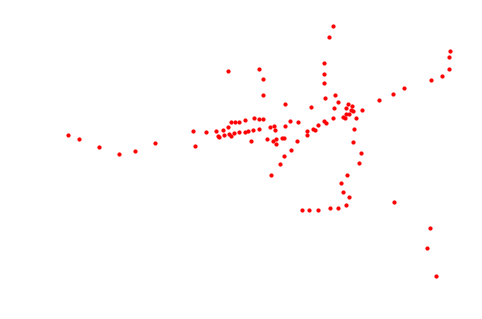

In [10]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

connections = dict() # empty dictionary to store connections

for key in station_per_line.keys(): # put every station into dictionary as key with empty value
    for station in station_per_line[key]:
        connections[station] = [] 

for key in station_per_line.keys(): # generate real station network
    for i in range(len(station_per_line[key])):
        if i == 0:
            connections[station_per_line[key][i]].append(station_per_line[key][i+1])
        elif i == len(station_per_line[key])-1:
            connections[station_per_line[key][i]].append(station_per_line[key][i-1])
        else:
            if station_per_line[key][i-1] in connections[station_per_line[key][i]]: continue
            else:
                connections[station_per_line[key][i]].append(station_per_line[key][i-1])
            
            if station_per_line[key][i+1] in connections[station_per_line[key][i]]: continue
            else:
                connections[station_per_line[key][i]].append(station_per_line[key][i+1])
print(connections)

station_graph = nx.Graph()                
station_graph.add_nodes_from(stations)
nx.draw(station_graph, station_coord, with_labels=False, node_size=10) # draw a graph of station location

/anaconda3/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


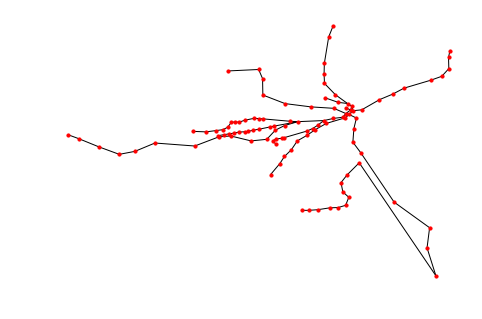

In [3]:
nx.draw(nx.Graph(connections), station_coord, with_labels=False, node_size=10) # draw the connection map

##### 3. Build the search agent

> Build the search agent based on the graph we build.

for example, when you run: 

```python
>>> search('奥体中心', '天安门') 
```
you need get the result: 

奥体中心-> A -> B -> C -> ... -> 天安门

In [4]:
def search(start, end):
    pathes = [[start]]
    passed = [start]
    
    while pathes:
        path = pathes.pop(0)
        frontier = path[-1]
        nxt = connections[frontier]
        
        for city in nxt:
            if city in passed: 
                continue
            else:
                new_path = path + [city]
                pathes.append(new_path)
                if city == end: return new_path
                passed.append(city) # don't return
def pretty_print(lst):
    print("->".join(lst))

In [5]:
pretty_print(search('Boylston', 'Ashmont'))
print("\n")
pretty_print(search('Malden Center', 'Boston College'))

Boylston->Park Street->Downtown Crossing->South Station->Broadway->Andrew->JFK/UMass->North Quincy->Quincy Center->Quincy Adams->Braintree->Savin Hill->Fields Corner->Shawmut->Ashmont


Malden Center->Wellington->Assembly->Sullivan Square->Community College->North Station->Haymarket->State->Downtown Crossing->Park Street->Boylston->Arlington->Copley->Kenmore->Blandford Street->Pleasant Street->Babcock Street->Packards Corner->Harvard Avenue->Griggs Street->Allston Street->Warren Street->Washington Street->Sutherland Road->Chiswick Road->South Street->Boston College


## （Optional）Create different policies for transfer system.

##### 4. As much as you can to use the already implemented search agent. You just need to define the **is_goal()**, **get_successor()**, **strategy()** three functions. 

> a.	Define different policies for transfer system. 

> b.	Such as Shortest Path Priority（路程最短优先）, Minimum Transfer Priority(最少换乘优先), Comprehensive Priority(综合优先)

> c.	Implement Continuous transfer. Based on the Agent you implemented, please add this feature: Besides the @param start and @param destination two stations, add some more stations, we called @param by_way, it means, our path should from the start and end, but also include the  @param by_way stations. 

e.g 
```
1. Input:  start=A,  destination=B, by_way=[C] 
    Output: [A, … .., C, …. B]
2. Input: start=A, destination=B, by_way=[C, D, E]
    Output: [A … C … E … D … B]  
    # based on your policy, the E station could be reached firstly. 
![image.png](attachment:image.png)
```

This question doesn't apply to my solution as Boston subway doen't have cricles.

##### 5.	Test your result with commercial applications. 

将你的结果和高德地图或者百度地图进行比较，如果有不同，请分析原因

I used Google Map and Apple Map, they are the same.